In [249]:
import json
import matplotlib.pyplot as plt
import os

from matplotlib.patches import Rectangle
from matplotlib.colors import Normalize, LogNorm
from matplotlib import cm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [196]:
state_dict = {"HI": (0, 1),
              "AK": (0, 7),
              "WA": (1, 5),
              "OR": (1, 4),
              "CA": (1, 3),
              "ID": (2, 5),
              "UT": (2, 4),
              "NV": (2, 3),
              "AZ": (2, 2),
              "MT": (3, 5),
              "WY": (3, 4),
              "CO": (3, 3),
              "NM": (3, 2),
              "ND": (4, 5),
              "SD": (4, 4),
              "NE": (4, 3),
              "KS": (4, 2),
              "OK": (4, 1),
              "MN": (5, 5),
              "IA": (5, 4),
              "MO": (5, 3),
              "AR": (5, 2),
              "LA": (5, 1),
              "TX": (5, 0),
              "WI": (6, 5),
              "IL": (6, 4),
              "IN": (6, 3),
              "KY": (6, 2),
              "MS": (6, 1),
              "MI": (7, 5),
              "OH": (7, 4),
              "WV": (7, 3),
              "TN": (7, 2),
              "AL": (7, 1),
              "PA": (8, 4),
              "VA": (8, 3),
              "SC": (8, 2),
              "GA": (8, 1),
              "NY": (9, 5),
              "NJ": (9, 4),
              "MD": (9, 3),
              "NC": (9, 2),
              "FL": (9, 0),
              "VT": (10, 6),
              "MA": (10, 5),
              "CT": (10, 4),
              "DE": (10, 3),
              "ME": (11, 7),
              "NH": (11, 6),
              "RI": (11, 5),
}
with open('../data/state_grid.json', 'w', encoding='utf-8') as f:
    json.dump(state_dict, f, ensure_ascii=False, indent=4)

In [255]:
df['rank'].values.astype(int)

array([  1,   2,   3, ..., 205, 205, 205])

In [259]:
def get_state_rank(df, sex):
    """ """
    ranks = []

    for year in df[df['sex']==sex]['year'].unique():
        df_i = df[(df['year'] == year)&(df['sex']==sex)]
        rank = df_i.rank(method='min',ascending=False)['count'].values.astype(int)
        ranks.extend(rank)
        
    return ranks

def load_states():
    """ Load babynames by state"""
    dfs = []

    fnames = glob("../data/namesbystate/*.TXT")
    names = ['state', 'sex', 'year', 'name', 'count']

    for fname in fnames:
        df_i = pd.read_csv(fname, names=names)
        # grab female names and rank first
        f_ranks = get_state_rank(df_i,'F')
        # grab male names and rank second
        m_ranks = get_state_rank(df_i,'M')
        
        df_i['rank'] = f_ranks + m_ranks
        dfs.append(df_i)
        
    df = pd.concat(dfs)
    return df

df = load_states()


In [242]:
df.to_parquet("../data/states_baby_names_merged.parquet.snappy")

In [260]:
df.to_csv("../data/states_baby_names_merged.tsv", sep='\t')

In [261]:
pd.read_csv("../data/states_baby_names_merged.tsv", sep='\t')

Unnamed: 0 state sex  year     name  count  rank
0                 0    IN   F  1910     Mary    619     1
1                 1    IN   F  1910    Helen    324     2
2                 2    IN   F  1910     Ruth    238     3
3                 3    IN   F  1910  Dorothy    215     4
4                 4    IN   F  1910  Mildred    200     5
...             ...   ...  ..   ...      ...    ...   ...
6311499       33701    DE   M  2021   Thiago      5   205
6311500       33702    DE   M  2021   Travis      5   205
6311501       33703    DE   M  2021     Troy      5   205
6311502       33704    DE   M  2021   Walker      5   205
6311503       33705    DE   M  2021     Zayn      5   205

[6311504 rows x 7 columns]

In [234]:
df[df['state']=='NY']

state sex  year      name  count  rank
0         NY   F  1910      Mary   1923     1
1         NY   F  1910     Helen   1290     2
2         NY   F  1910      Rose    990     3
3         NY   F  1910      Anna    951     4
4         NY   F  1910  Margaret    926     5
...      ...  ..   ...       ...    ...   ...
309527    NY   M  2021     Yusef      5  2048
309528    NY   M  2021     Yusif      5  2049
309529    NY   M  2021    Zaidan      5  2050
309530    NY   M  2021     Zaine      5  2051
309531    NY   M  2021     Zymir      5  2052

[309532 rows x 6 columns]

In [258]:
df2[(df2['state']=='NY') & (df2['sex']=='F')]

state sex  year      name  count    rank
0         NY   F  1910      Mary   1923     1.0
1         NY   F  1910     Helen   1290     2.0
2         NY   F  1910      Rose    990     3.0
3         NY   F  1910      Anna    951     4.0
4         NY   F  1910  Margaret    926     5.0
...      ...  ..   ...       ...    ...     ...
176369    NY   F  2021     Zella      5  2086.0
176370    NY   F  2021    Zemira      5  2086.0
176371    NY   F  2021    Zianna      5  2086.0
176372    NY   F  2021   Zuleyka      5  2086.0
176373    NY   F  2021      Zury      5  2086.0

[176374 rows x 6 columns]

In [245]:
df2 = pd.read_parquet("../data/states_baby_names_merged.parquet.snappy")

In [229]:
df[df['sex']=='M']['rank'].max()

2968

In [230]:
name='Michael'
sex='M'
sub_df = df[(df['name']==name)&(df['year']==int(year))&(df['sex']==sex)]


In [36]:
x = sub_df[['state','count']]
x.set_index('state').to_dict()['count']

{'IN': 611,
 'IL': 1543,
 'KS': 250,
 'SC': 380,
 'HI': 84,
 'GA': 924,
 'SD': 52,
 'CO': 443,
 'NH': 127,
 'MS': 270,
 'MD': 618,
 'UT': 251,
 'LA': 426,
 'ME': 96,
 'WI': 463,
 'NJ': 1437,
 'AR': 249,
 'NY': 2890,
 'MT': 63,
 'OK': 324,
 'MA': 1018,
 'NM': 184,
 'WY': 37,
 'OH': 1371,
 'OR': 292,
 'NV': 190,
 'TX': 2437,
 'TN': 637,
 'AZ': 621,
 'MN': 449,
 'WA': 510,
 'WV': 190,
 'NC': 863,
 'MO': 579,
 'AL': 452,
 'VA': 777,
 'CA': 3572,
 'CT': 553,
 'AK': 74,
 'ND': 45,
 'VT': 52,
 'MI': 996,
 'NE': 138,
 'KY': 468,
 'ID': 110,
 'DC': 104,
 'IA': 214,
 'FL': 1829,
 'PA': 1491,
 'RI': 147,
 'DE': 139}

In [13]:
year=2000
print(df[(df['name']=='Michael')&(df['year']==year)&(df['sex']=='M')] )

       state sex  year     name  count
124170    IN   M  2000  Michael    611
204855    IL   M  2000  Michael   1543
84400     KS   M  2000  Michael    250
106231    SC   M  2000  Michael    380
49177     HI   M  2000  Michael     84
160919    GA   M  2000  Michael    924
43091     SD   M  2000  Michael     52
94645     CO   M  2000  Michael    443
35248     NH   M  2000  Michael    127
103784    MS   M  2000  Michael    270
97865     MD   M  2000  Michael    618
77602     UT   M  2000  Michael    251
134247    LA   M  2000  Michael    426
46293     ME   M  2000  Michael     96
103579    WI   M  2000  Michael    463
135394    NJ   M  2000  Michael   1437
92400     AR   M  2000  Michael    249
265063    NY   M  2000  Michael   2890
41280     MT   M  2000  Michael     63
105324    OK   M  2000  Michael    324
106380    MA   M  2000  Michael   1018
68026     NM   M  2000  Michael    184
25240     WY   M  2000  Michael     37
175385    OH   M  2000  Michael   1371
77867     OR   M  2000  M

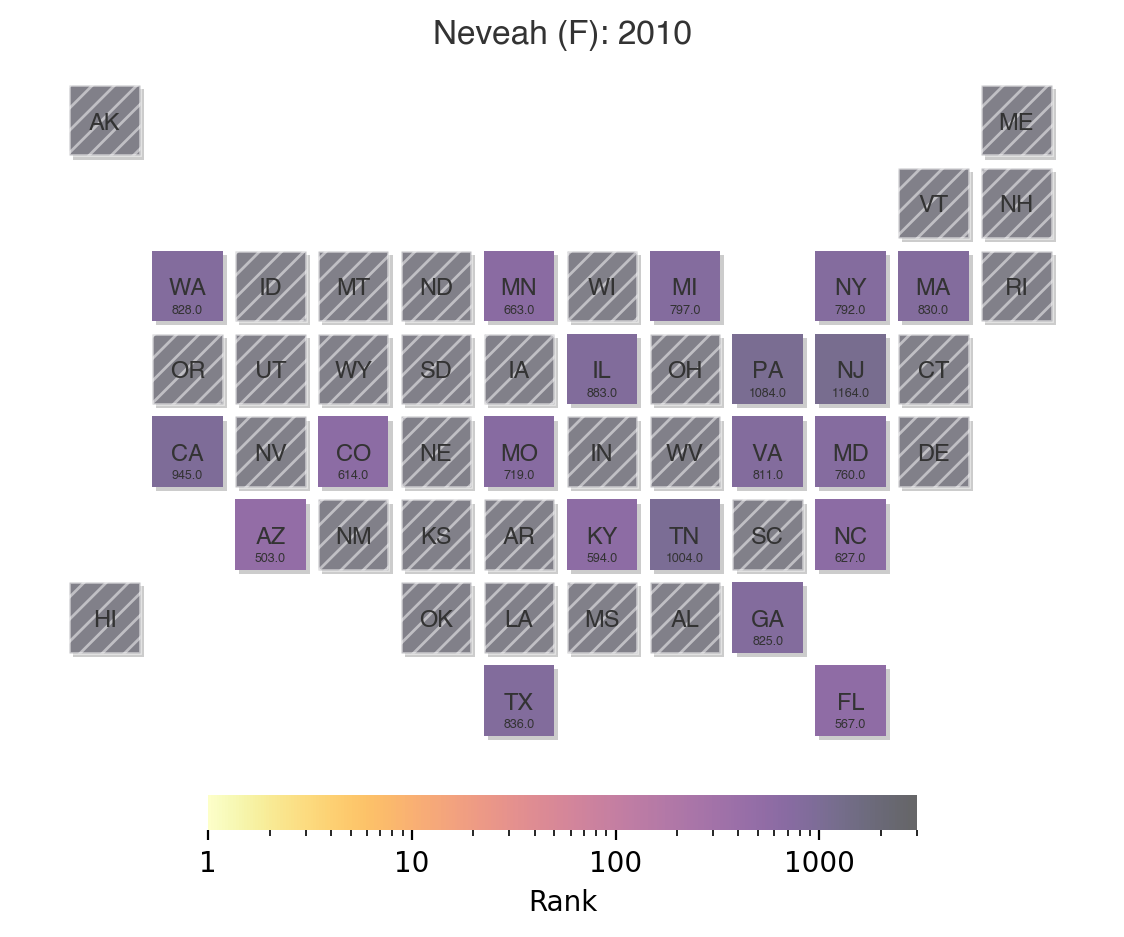

In [256]:

def state_grid_plot(state_dict, df, name, sex, year, cmap, h_space=0.15, v_space=0.15):
    """ """
    height = 1-v_space
    width = 1-h_space
    k=2
    f,ax = plt.subplots(figsize=(7,5),dpi=200)
    max_rank = df[df['name']==name]['rank'].max()
    norm = LogNorm(vmin=1, vmax=3000)
    sub_df = df[(df['name']==name)&(df['year']==int(year))&(df['sex']==sex)]
    data = sub_df.set_index('state').to_dict()['rank']

    for state, state_coords in state_dict.items():
        
        state_coords_b = (state_coords[0]+0.05,state_coords[1]-0.05)
        ax.add_patch(Rectangle(state_coords_b,
                               height=height, width=width,
                               facecolor='k', alpha=0.2, zorder=0))
        ax.add_patch(Rectangle(state_coords, height=height,
                               width=width,
                               facecolor='w', alpha=1, zorder=0))
        try:
            cax = ax.add_patch(Rectangle(state_coords,
                                   height=height, width=width,
                                   facecolor=cmap(norm(data[state])), alpha=0.6))
            ax.text(state_coords[0]+width/k, state_coords[1]+(height-v_space/2)/k/3, data[state],
                horizontalalignment='center',
                verticalalignment='center',
                fontname='Helvetica',
                color='#333333',
                fontsize=4.5)
        except KeyError:
            ax.add_patch(Rectangle(state_coords,
                                   height=height, width=width,
                                   facecolor=cmap(norm(max_rank)), alpha=0.5,
                                   hatch='///', edgecolor='w'))
        ax.text(state_coords[0]+width/k, state_coords[1]+(height-v_space/2)/k, state,
                horizontalalignment='center',
                verticalalignment='center',
                fontname='Helvetica',
                color='#333333',
                fontsize=8.5)

    ax.set_ylim(-1,10)
    ax.set_xlim(-1,10)
    ax.axis('equal')
    
    plt.axis('off')
    cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
                        orientation='horizontal',
                        alpha=0.6,
                        fraction=0.046,
                        pad=0.04)
    cbar.ax.set_xlabel('Rank', rotation=0)
    cbar.ax.set_xticks([1,10,100,1000])
    cbar.ax.set_xticklabels([1,10,100,1000])
    cbar.outline.set_visible(False)
    ax.set_title(f"{name} ({sex}): {year}",
                 fontname='Helvetica',
                 color='#333333', )

    return f, ax
    
cmap = cm.get_cmap('inferno_r')

name = "Neveah"
year='2010'
sex='F'
sub_df = df[(df['name']==name)&(df['sex']==sex)]
%lprun -f state_grid_plot state_grid_plot(state_dict, sub_df, name, sex, year ,cmap)

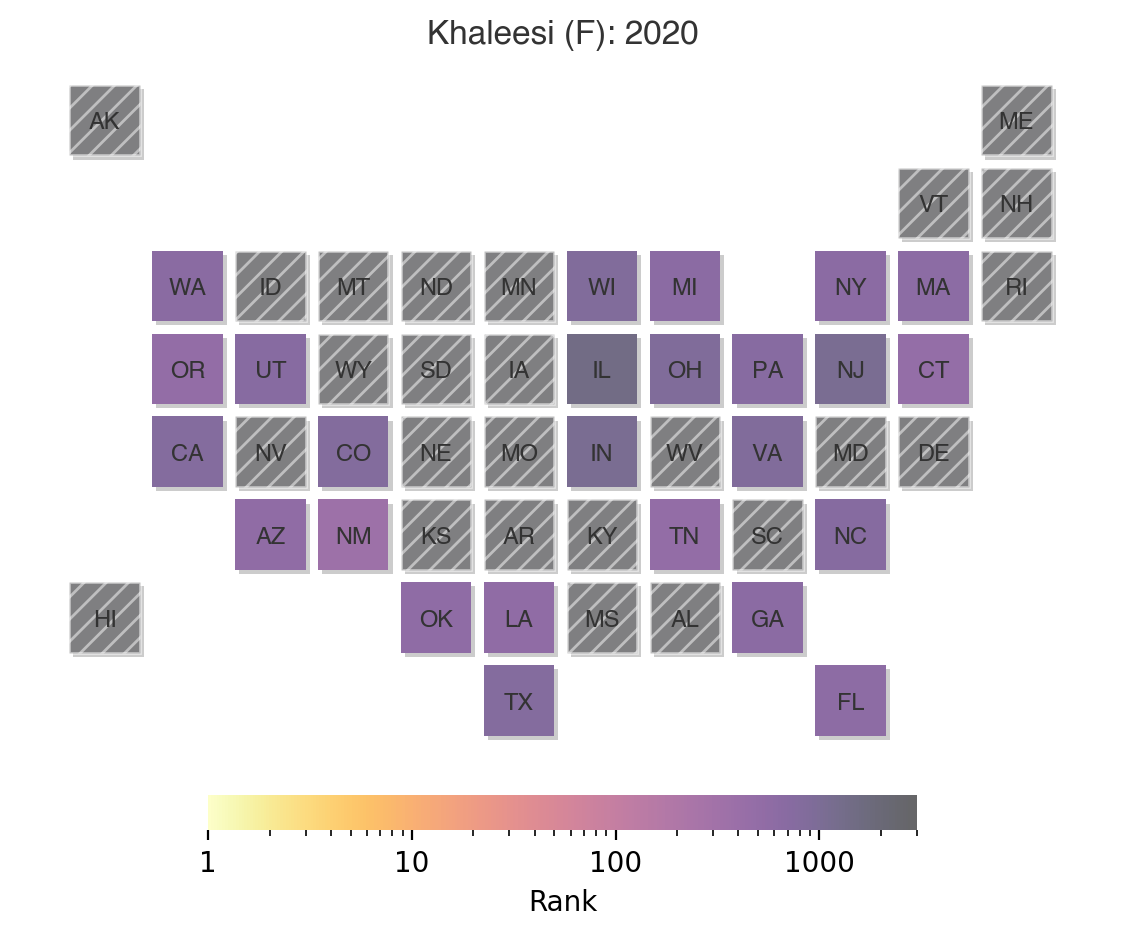

In [201]:
name = "Khaleesi"
year='2020'
sex='F'
sub_df = df[(df['name']==name)&(df['sex']==sex)]

f,ax = state_grid_plot(state_dict,df,name,sex,year,cmap)

In [182]:
def create_name_pdfs(name, sex, df, cmap):
    """Create names"""
    pth = f'../figures/{name}'
    if not os.path.isdir(pth):
        os.mkdir(pth)
    sub_df = df[(df['name']==name)&(df['sex']==sex)]

    for i,year in enumerate(range(1910,2021)):
        f,ax = state_grid_plot(state_dict,sub_df,name,sex,year,cmap)
        
        fname = f"../figures/{name}/{name}_{i}_{sex}_name_rank.png"
        plt.savefig(fname)
        plt.close()

In [257]:
name = "Jose"
year='2010'
sex = 'M'
create_name_pdfs(name, sex, df, cmap)

In [195]:
%lprun -f create_name_pdfs create_name_pdfs('Shirley', "F", df, cmap)